In [9]:
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import numpy as np
from morning.pipeline.stream.cybos.stock.db.min_excel_tick import MinExcelTick
from morning.pipeline.converter.cybos.stock.day_tick import StockDayTickConverter
import pandas as pd

In [64]:
class Receiver:
    def __init__(self):
        self.data = []
    
    def received(self, datas):
        for d in datas:
            self.data.append(d)

def get_reversed(s):
    distance_from_mean = s.mean() - s
    return distance_from_mean + s.mean()

sdtc = StockDayTickConverter()
met = MinExcelTick('sample_data/20191129_A028300.xlsx')
met.set_output(sdtc)
rcv = Receiver()
sdtc.set_output(rcv)
while met.received(None) > 0:
    pass
data = rcv.data

df = pd.DataFrame(data)

df['avg'] = df['close_price'].rolling(10).mean()
not_non = df['avg'].notna().idxmax()
if not_non > 0:
    #print(df['avg'].iloc[not_non])
    df['avg'] = df['avg'].fillna(df['avg'].iloc[not_non])

price = np.array(df['avg'])
reverse_price = np.array(get_reversed(price))
df['rev'] = reverse_price


#### find_peaks and peak prominence testing

In [70]:
x = df['avg']
peaks, _ = find_peaks(x, distance=10)
prominences = peak_prominences(x, peaks)[0]
contour_heights = x[peaks] - prominences
"""
plt.plot(x)
plt.plot(df['close_price'])
plt.plot(peaks, x[peaks], 'x')
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])
"""

"\nplt.plot(x)\nplt.plot(df['close_price'])\nplt.plot(peaks, x[peaks], 'x')\nplt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])\n"

In [74]:
%timeit  find_peaks(x, distance=10)
%timeit peak_prominences(x, peaks)
print(peaks)

65.3 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
39.6 µs ± 2.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[ 50  60  77 101 139 152 182 192 217 244 272 286 297 313 324 342 353 363]


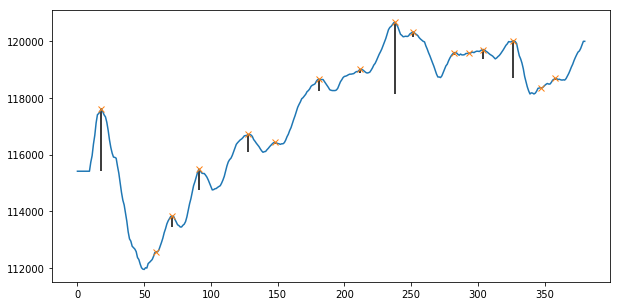

In [66]:
x = df['rev']
peaks, _ = find_peaks(x, distance=10)
prominences = peak_prominences(x, peaks)[0]
contour_heights = x[peaks] - prominences
plt.plot(x)
plt.plot(peaks, x[peaks], 'x')
plt.vlines(x=peaks, ymin=contour_heights, ymax=x[peaks])

In [28]:
peak_prominences(x, peaks)

(array([2210.,   10.,  380.,  740.,  630.,   70.,  400.,  130., 2530.,
         170.,   90.,   10.,  330., 1300.,   10.,   60.]),
 array([  9,  50,  50,  50,  50, 139,  50,  50,  50, 244, 272, 286, 272,
        272, 342, 342]),
 array([ 50,  60,  77, 101, 139, 152, 191, 217, 339, 339, 286, 294, 313,
        339, 348, 363]))